In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm
import mmd_utils as mmt
import pandas as pd
import matplotlib.pyplot as plt
from pyarrow import dataset as ds
import ray

In [4]:
my_runtime_env = {"working_dir": "."}

In [5]:
if ray.is_initialized():
    ray.shutdown()
ray.init(runtime_env=my_runtime_env, ignore_reinit_error=True)

2023-01-15 15:03:56,646	INFO worker.py:1230 -- Using address localhost:9031 set in the environment variable RAY_ADDRESS
2023-01-15 15:03:56,910	INFO worker.py:1352 -- Connecting to existing Ray cluster at address: 172.31.133.189:9031...
2023-01-15 15:03:56,968	INFO worker.py:1529 -- Connected to Ray cluster. View the dashboard at https://console.anyscale.com/api/v2/sessions/ses_rut7hmhre9n99e1valzhcmjhnt/services?redirect_to=dashboard 
2023-01-15 15:03:56,976	INFO packaging.py:546 -- Creating a file package for local directory '.'.
2023-01-15 15:03:56,982	INFO packaging.py:373 -- Pushing file package 'gcs://_ray_pkg_cc865a1663066922.zip' (0.27MiB) to Ray cluster...
2023-01-15 15:03:56,986	INFO packaging.py:386 -- Successfully pushed file package 'gcs://_ray_pkg_cc865a1663066922.zip'.


Python version:,3.10.4
Ray version:,2.2.0
Dashboard:,http://console.anyscale.com/api/v2/sessions/ses_rut7hmhre9n99e1valzhcmjhnt/services?redirect_to=dashboard


In [6]:
# Let's read the data as pyarrow table
dataset = ds.dataset(
        "s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/",
        partitioning=["year", "month"],
)

In [7]:
# Let's use three sklearn estimator models
models = [LinearRegression(), 
          DecisionTreeRegressor(),
          DecisionTreeRegressor(splitter="random"),
        ]
        
# Define batch sizes and tracking list 
all_stats_times = []
# starting_indexes = [-1]
starting_indexes = [-3, -6, -9, -12, -15, -18]

In [ ]:
for starting_idx in tqdm(starting_indexes):
    files = [f"s3://anonymous@{file}" for file in tqdm(dataset.files)][starting_idx:]
    print(f"Total files obtained {len(files)}")
    results, time_stats = mmt.run_batch_training(files, models=models, verbose=False)
    all_stats_times.append(time_stats)
    print(f"Sample of results: {results[:-1][0]}")
    print("", flush=True)
    print(f"Total number of pickup locations: {time_stats['total_pickup_locations']}")
    print(f"Total number of pickup locations with enough records to train: {time_stats['total_pickup_locations_trained']}")
    print(f"Total number of models trained: {time_stats['total_models_trained']}")
    print(f"TOTAL TIME TAKEN: {time_stats['total_training_time']} seconds")
    print("--" * 10)

100%|██████████| 18/18 [00:00<00:00, 349525.33it/s]


Total files obtained 3
Starting unoptimized run: each task reading each file into memory ...
(scheduler +47s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(scheduler +47s) Adding 1 node(s) of type worker-node-type-0.
Sample of results: ('s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/2019/04/data.parquet/7e490662e39c4bfe8c64c6a2c45c9e8b_000000.parquet', 239, ([(DecisionTreeRegressor(), 459.427), (DecisionTreeRegressor(splitter='random'), 459.433), (LinearRegression(), 633.82)],))

Total number of pickup locations: 783
Total number of pickup locations with enough records to train: 783
Total number of models trained: 2349
TOTAL TIME TAKEN: 46.245 seconds
--------------------


100%|██████████| 18/18 [00:00<00:00, 335544.32it/s]


Total files obtained 6
Starting unoptimized run: each task reading each file into memory ...
(scheduler +1m52s) Resized to 64 CPUs.
Sample of results: ('s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/2019/01/data.parquet/ecce6478ad09480cbc8539e0b6197c2d_000000.parquet', 151, ([(DecisionTreeRegressor(splitter='random'), 498.423), (DecisionTreeRegressor(), 498.487), (LinearRegression(), 667.003)],))

Total number of pickup locations: 1568
Total number of pickup locations with enough records to train: 1568
Total number of models trained: 4704
TOTAL TIME TAKEN: 74.149 seconds
--------------------


100%|██████████| 18/18 [00:00<00:00, 260336.11it/s]


Total files obtained 9
Starting unoptimized run: each task reading each file into memory ...
Sample of results: ('s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/2018/10/data.parquet/20624e28db574114b47de3e43065f014_000000.parquet', 68, ([(DecisionTreeRegressor(), 591.707), (DecisionTreeRegressor(splitter='random'), 591.707), (LinearRegression(), 744.262)],))

Total number of pickup locations: 2355
Total number of pickup locations with enough records to train: 2355
Total number of models trained: 7065
TOTAL TIME TAKEN: 100.471 seconds
--------------------


100%|██████████| 18/18 [00:00<00:00, 387166.52it/s]


Total files obtained 12
Starting unoptimized run: each task reading each file into memory ...
Sample of results: ('s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/2018/07/data.parquet/ccdef45e50de4678b7e589155f372a3d_000000.parquet', 145, ([(DecisionTreeRegressor(splitter='random'), 431.375), (DecisionTreeRegressor(), 432.584), (LinearRegression(), 634.351)],))

Total number of pickup locations: 3137
Total number of pickup locations with enough records to train: 3137
Total number of models trained: 9411
TOTAL TIME TAKEN: 123.332 seconds
--------------------


100%|██████████| 18/18 [00:00<00:00, 346318.68it/s]


Total files obtained 15
Starting unoptimized run: each task reading each file into memory ...
(scheduler +6m27s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
Sample of results: ('s3://anonymous@air-example-data/ursa-labs-taxi-data/by_year/2018/04/data.parquet/f40c2c2806e548bfac8336de9c19a423_000000.parquet', 145, ([(DecisionTreeRegressor(splitter='random'), 388.191), (DecisionTreeRegressor(), 388.479), (LinearRegression(), 617.722)],))

Total number of pickup locations: 3918
Total number of pickup locations with enough records to train: 3918
Total number of models trained: 11754
TOTAL TIME TAKEN: 150.387 seconds
--------------------


100%|██████████| 18/18 [00:00<00:00, 366492.58it/s]


Total files obtained 18
Starting unoptimized run: each task reading each file into memory ...
(scheduler +8m53s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


In [9]:
# Print all cumulative results and stats
# all_stats_times_df = pd.DataFrame(all_stats_times, index=[1])
all_stats_times_df = pd.DataFrame(all_stats_times, index=[3, 6, 9, 12, 15, 18])
display(all_stats_times_df)

,total_pickup_locations,total_pickup_locations_trained,total_models_trained,total_training_time
3,783,783,2349,44.385
6,1568,1568,4704,79.245
9,2355,2355,7065,117.615
12,3137,3137,9411,160.652
15,3918,3918,11754,209.957
18,4700,4700,14100,254.213


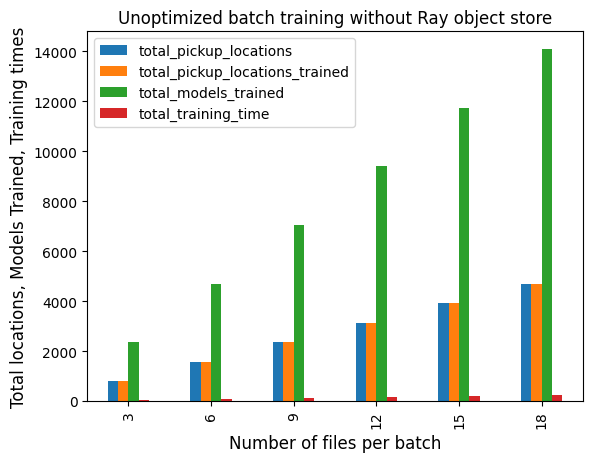

In [10]:
# Plot some times
all_stats_times_df.plot(kind="bar")

plt.ylabel("Total locations, Models Trained, Training times", fontsize=12)
plt.xlabel("Number of files per batch", fontsize=12)
plt.title("Unoptimized batch training without Ray object store")
plt.grid(False)
plt.show()

In [11]:
ray.shutdown()